In [1]:
#code original en ligne : https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb

In [2]:
# Import des bibliotheques 

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [4]:
# Téléchargement du jeu de données 

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [6]:
# Afficher les dimensions des ensembles de données

In [7]:
print("Dimensions des ensembles d'entraînement, de validation et de test :")
print("Entraînement :", X_train.shape, y_train.shape)
print("Validation   :", X_valid.shape, y_valid.shape)
print("Test         :", X_test.shape, y_test.shape)

Dimensions des ensembles d'entraînement, de validation et de test :
Entraînement : (55000, 28, 28, 1) (55000,)
Validation   : (5000, 28, 28, 1) (5000,)
Test         : (10000, 28, 28, 1) (10000,)


In [8]:
# Architecture du CNN

In [9]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [10]:
# Entraînement du modèle

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)


Epoch 1/10


1719/1719 [==============================] - 285s 162ms/step - loss: 0.7153 - accuracy: 0.7525 - val_loss: 0.3875 - val_accuracy: 0.8602
Epoch 2/10
1719/1719 [==============================] - 291s 169ms/step - loss: 0.4383 - accuracy: 0.8551 - val_loss: 0.3620 - val_accuracy: 0.8748
Epoch 3/10
1719/1719 [==============================] - 282s 164ms/step - loss: 0.3760 - accuracy: 0.8740 - val_loss: 0.3054 - val_accuracy: 0.8876
Epoch 4/10
1719/1719 [==============================] - 293s 171ms/step - loss: 0.3378 - accuracy: 0.8846 - val_loss: 0.3042 - val_accuracy: 0.8934
Epoch 5/10
1719/1719 [==============================] - 358s 209ms/step - loss: 0.3150 - accuracy: 0.8939 - val_loss: 0.2899 - val_accuracy: 0.8984
Epoch 6/10
1719/1719 [==============================] - 504s 294ms/step - loss: 0.2963 - accuracy: 0.8997 - val_loss: 0.2879 - val_accuracy: 0.8992
Epoch 7/10
1719/1719 [==============================] - 495s 288ms/step - loss: 0.2828 - accuracy: 0.9037 - v

In [12]:
# Prédictions

In [13]:
X_new = X_train[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 185ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.79, 0.  , 0.  , 0.08, 0.  , 0.  , 0.13, 0.  , 0.  , 0.  ]],
      dtype=float32)

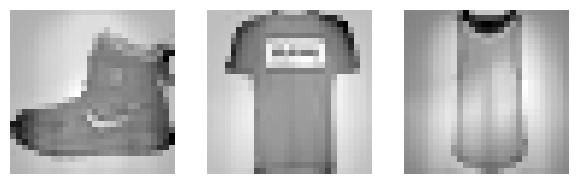

In [14]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [15]:
# Afficher les dimensions des ensembles de données
print("Dimensions des ensembles d'entraînement, de validation et de test :")
print("Entraînement :", X_train.shape, y_train.shape)
print("Validation   :", X_valid.shape, y_valid.shape)
print("Test         :", X_test.shape, y_test.shape)

Dimensions des ensembles d'entraînement, de validation et de test :
Entraînement : (55000, 28, 28, 1) (55000,)
Validation   : (5000, 28, 28, 1) (5000,)
Test         : (10000, 28, 28, 1) (10000,)


In [16]:
print (y_train[:3])
print(y_train.dtype)

[9 0 0]
uint8
